Data Source : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

CLASSPATH = "cancer/"

In [2]:
with open(CLASSPATH + "wdbc.names.txt","r") as file:
    content = file.readlines()
content

['1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)\n',
 '\n',
 '2. Source Information\n',
 '\n',
 'a) Creators: \n',
 '\n',
 '\tDr. William H. Wolberg, General Surgery Dept., University of\n',
 '\tWisconsin,  Clinical Sciences Center, Madison, WI 53792\n',
 '\twolberg@eagle.surgery.wisc.edu\n',
 '\n',
 '\tW. Nick Street, Computer Sciences Dept., University of\n',
 '\tWisconsin, 1210 West Dayton St., Madison, WI 53706\n',
 '\tstreet@cs.wisc.edu  608-262-6619\n',
 '\n',
 '\tOlvi L. Mangasarian, Computer Sciences Dept., University of\n',
 '\tWisconsin, 1210 West Dayton St., Madison, WI 53706\n',
 '\tolvi@cs.wisc.edu \n',
 '\n',
 'b) Donor: Nick Street\n',
 '\n',
 'c) Date: November 1995\n',
 '\n',
 '3. Past Usage:\n',
 '\n',
 'first usage:\n',
 '\n',
 '\tW.N. Street, W.H. Wolberg and O.L. Mangasarian \n',
 '\tNuclear feature extraction for breast tumor diagnosis.\n',
 '\tIS&T/SPIE 1993 International Symposium on Electronic Imaging: Science\n',
 '\tand Technology, volume 1905, pages 861

In [3]:
wdbc = pd.read_csv(CLASSPATH + "wdbc.data.csv",
            header = None,
            names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                     'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                     'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                     'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                     'fractal_dimension_se', 'radius_worst', 'texture_worst',
                     'perimeter_worst', 'area_worst', 'smoothness_worst',
                     'compactness_worst', 'concavity_worst', 'concave points_worst',
                     'symmetry_worst', 'fractal_dimension_worst']
           )


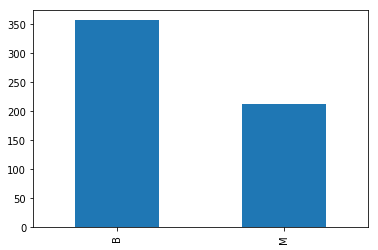

In [4]:
wdbc["diagnosis"].value_counts().plot.bar()

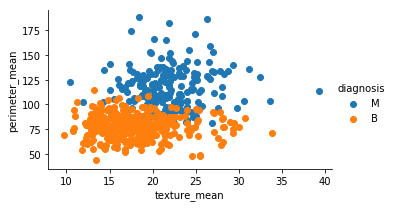

In [11]:
fg = sns.FacetGrid(data = wdbc, hue = 'diagnosis', aspect = 1.61)
fg.map(plt.scatter, 'texture_mean', 'perimeter_mean').add_legend()

In [6]:
X_train = wdbc[["texture_mean","perimeter_mean"]]
Y = wdbc["diagnosis"]

,texture_mean,perimeter_mean
r,21.57,85.24
b,18.94,75.51


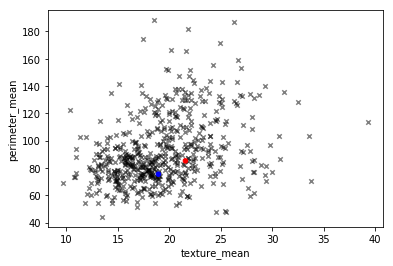

In [7]:
# Initialize 3 centroids at random from the data.
centroids = X_train.sample(2)

# Call the three clusters "red", "blue", "yellow" for convenience.
centroids.index = ["r", "b"]

# Plot these centroids.
ax = X_train.plot.scatter(x="texture_mean", y="perimeter_mean", 
                          c="black", marker="x", alpha=.5)
centroids.plot.scatter(x="texture_mean", y="perimeter_mean", 
                       c=centroids.index, ax=ax)

centroids

In [8]:
# Finds the nearest centroid to a given observation.
def get_nearest_centroid(obs):
    dists = np.sqrt(((obs - centroids) ** 2).sum(axis=1))
    return dists.idxmin()

get_nearest_centroid(X_train.loc[0])

'r'

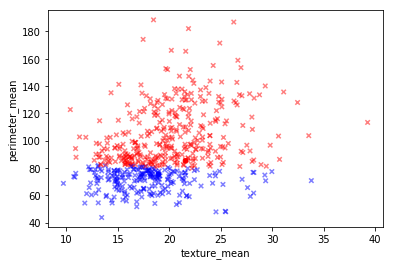

In [9]:
# Apply the function to the entire data set.
clusters = X_train.apply(get_nearest_centroid, axis=1)

# Plot the cluster assignments.
ax = X_train.plot.scatter(x="texture_mean", y="perimeter_mean", 
                          c=clusters, marker="x", alpha=.5)
centroids.plot.scatter(x="texture_mean", y="perimeter_mean", 
                       c=centroids.index, ax=ax)